In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos"

Mounted at /content/drive
/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos


In [2]:
import os
import typing
from typing import List, Tuple, Dict
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

Función para cargar audios

In [3]:
def calling_audios(data_path:str)->List[str]:
    '''
        Cargando los nombres de los audios
    '''
    names = list()
    for dirname, _, filenames in os.walk(data_path):
        for filename in filenames:
            names.append(filename)
    return names

Leyendo Audios

In [8]:
data_path_train = '/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos/IRMAS-Sample/Training'

In [9]:
training_names = calling_audios(data_path_train)

In [11]:
# Audio Numbers
print("Number of total audios: ")
print(len(training_names))

print("Name Example: ")
print(training_names[0])

Number of total audios: 
3
Name Example: 
001__[vio][nod][cou_fol]2194__1.wav


In [12]:
import IPython.display as ipd
ipd.Audio(data_path_train+'/sax/118__[sax][nod][jaz_blu]1702__3.wav',rate=22050) # load a local WAV file

In [13]:
y, sr = librosa.load(data_path_train+'/sax/118__[sax][nod][jaz_blu]1702__3.wav',sr=22050)

Construyamos un mini-ejemplo para entender el funcionamiento de las ventanas

In [14]:
x = np.array(range(0,14))
print(len(x))

14


In [15]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [16]:
hop_length = 3
frame_length = 8

In [17]:
energy = np.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])

In [18]:
for i in range(0, len(x), hop_length):
  print(i)
  print(x[i:i+frame_length])
  print()

0
[0 1 2 3 4 5 6 7]

3
[ 3  4  5  6  7  8  9 10]

6
[ 6  7  8  9 10 11 12 13]

9
[ 9 10 11 12 13]

12
[12 13]



Vamos con el audio cargado

In [19]:
hop_length = 512  #tamaño del overlap
frame_length = 1024 # cantidad de frames por sumar

Funcion programada desde cero

In [20]:
def scratch_energy(y:np.array, hop_length: int, frame_length: int)-> np.array:
  energy = list()
  for i in range(0,len(y),hop_length):
    energy.append(np.sqrt(np.sum(y[i:i+frame_length]**2)/frame_length))
  return np.array(energy)

In [21]:
y_energy = scratch_energy(y,hop_length, frame_length)

In [22]:
len(y_energy)

130

Usando Librosa

In [24]:
help(librosa.feature.rms)

Help on function rms in module librosa.feature.spectral:

rms(*, y: Optional[numpy.ndarray] = None, S: Optional[numpy.ndarray] = None, frame_length: int = 2048, hop_length: int = 512, center: bool = True, pad_mode: Union[Literal['constant', 'edge', 'linear_ramp', 'maximum', 'mean', 'median', 'minimum', 'reflect', 'symmetric', 'wrap', 'empty'], Callable[..., Any]] = 'constant', dtype: Union[numpy.dtype[Any], NoneType, Type[Any], numpy._typing._dtype_like._SupportsDType[numpy.dtype[Any]], str, Tuple[Any, int], Tuple[Any, Union[SupportsIndex, Sequence[SupportsIndex]]], List[Any], numpy._typing._dtype_like._DTypeDict, Tuple[Any, Any]] = <class 'numpy.float32'>) -> numpy.ndarray
    Compute root-mean-square (RMS) value for each frame, either from the
    audio samples ``y`` or from a spectrogram ``S``.
    
    Computing the RMS value from audio samples is faster as it doesn't require
    a STFT calculation. However, using a spectrogram will give a more accurate
    representation of energy

In [25]:
rmse = librosa.feature.rms(y = y, frame_length=frame_length, hop_length=hop_length)[0]

In [26]:
rmse.shape

(130,)

Intenta tu definir la funcion RMSE

In [27]:
def scratch_rmse_energy(y:np.array, hop_length: int, frame_length: int)-> np.array:
  # Crea una lista vacia para guardar los valores promedidados de energía por ciclo
  # Calculo los valores RMSE de energia y almacenalos
  pass

Observemos lo siguientes gráficos

In [28]:
frames = range(len(rmse))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

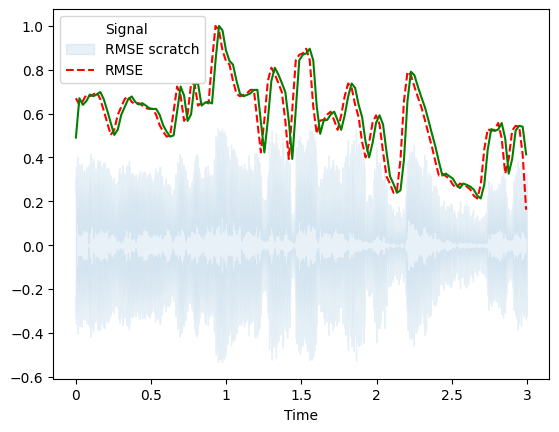

In [32]:
librosa.display.waveshow(y, sr=sr, alpha=0.1)
plt.plot(t, y_energy/np.max(y_energy), 'r--')             # normalizando para visualizar
plt.plot(t[:len(rmse)], rmse/np.max(rmse), color='g') # normalizando para visualizar
plt.legend(('Signal','RMSE scratch', 'RMSE'))

In [33]:
(y_energy==rmse).all()

False

In [34]:
y_energy[0:5]

array([0.14785269, 0.14118951, 0.14497665, 0.15150273, 0.14982883])

In [35]:
rmse[0:5]

array([0.10824101, 0.14785269, 0.14118952, 0.14497665, 0.15150273],
      dtype=float32)